In [1]:
import pandas as pd
data = pd.read_csv("data.csv")


In [2]:
import numpy as np

In [3]:
data = data[['result', 'text']]


In [4]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import (train_test_split, StratifiedShuffleSplit,cross_val_score)
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    data['text'],
    data['result'],
    test_size=0.2,
    random_state=55,
)

#instantiate countvectorizer 
vectorizer = TfidfVectorizer()

#fit training data
training_data = vectorizer.fit_transform(X_train)

#transform test data
testing_data = vectorizer.transform(X_test)

naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

predictions = naive_bayes.predict(testing_data)

In [6]:
print('accuracy: {}'.format(accuracy_score(y_test, predictions)))

accuracy: 0.9090909090909091


#cross validation
X_whole = vectorizer.fit_transform(data['text'])
le = LabelEncoder()
y_enc = le.fit_transform(data['result'])
scores = cross_val_score(naive_bayes, X_whole, y_enc, cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=100))
scores.mean()

In [7]:
def similar_word(word):
    dist = []
    for i in defwords:
        dist.append(nltk.edit_distance(word, i))
    a =max(dist)
    b = dist.index(a)
    return defwords[b]

In [8]:
import re
import string
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer= PorterStemmer()
stopwords = stopwords.words('english')
ntstp = ['am','will','being','is',"don't",'are','against','after','to','out','no','not',"aren't",'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't",'ain',
 'aren']
for i in ntstp :
    stopwords.remove(i)
defwords = vectorizer.get_feature_names()
defwords.remove('10')

def pre_processing(input_str):
    num_remove = re.sub(r'\d+', '', input_str)
    pun_remove = num_remove.translate(string.punctuation)
    stop_words = set(stopwords)
    tokens = word_tokenize(pun_remove)
    result = [i for i in tokens if not i in stop_words]
    for word in range(len(result)):
        result[word] = stemmer.stem(result[word])
    for i in range(len(result)):
        if result[i] not in defwords:
            result[i] = similar_word(result[i])
    return result
   


In [9]:
li = pre_processing("no i will not wait")
print(li)
sentence =""
for i in li:
    sentence = sentence + i + " "
naive_bayes.predict(vectorizer.transform([sentence]))

['no', 'will', 'not', 'wait']


array(['no'], dtype='<U3')

In [10]:

yes = data[data['result'] == 'yes']
no = data[data['result'] == 'no']

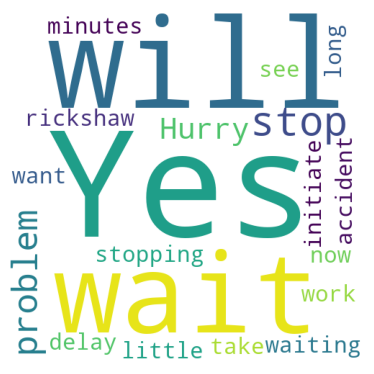

In [11]:
from wordcloud import WordCloud

words = '' 

for t in yes["text"]: 
      
    # typecaste each val to string 
    #val = str(val) 
  
    # split the value 
    tokens = t.split() 
      
      
    words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

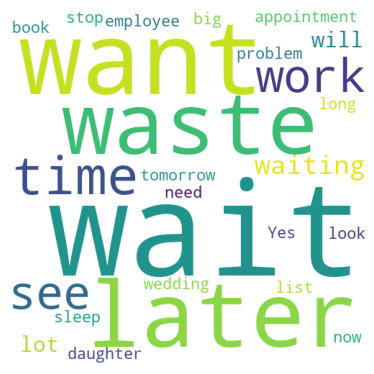

In [12]:
from wordcloud import WordCloud

words = '' 

for t in no["text"]: 
      
    # typecaste each val to string 
    #val = str(val) 
  
    # split the value 
    tokens = t.split() 
      
      
    words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()